In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso

# 0. Load Data into dataframe

In [87]:
df = pd.read_csv("../../../../Datasets/ML/scooter_battery_dataset.csv")

# 1. Null values
###  Mean Median Mode

In [88]:
total = df.isna().sum()
print(total/df.shape[0]*100)

RideDistance_km        0.0
AvgSpeed_kmh           0.0
Temperature_C          0.0
RiderWeight_kg         0.0
BatteryDrop_Percent    0.0
dtype: float64


# dupliates

In [89]:
df.shape

(900, 5)

In [90]:
df.drop_duplicates().shape

(900, 5)

# outlier  IQR Q1 Q2 Q3 
- lower = Q1-1.5*IQR
- ipper = Q3+1.5*IQR
# Z score
- (x - mean(x)/sd)  -3 to 3

In [91]:
def remove_outliers(columns: list):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        u_bound = Q3 + 1.5 * IQR
        l_bound = Q1 - 1.5 * IQR

        df.drop(df[(df[col] > u_bound) | (df[col] < l_bound)].index, inplace = True)
        df.reset_index(drop = True, inplace = True)

remove_outliers(df.columns)
df.shape

(840, 5)

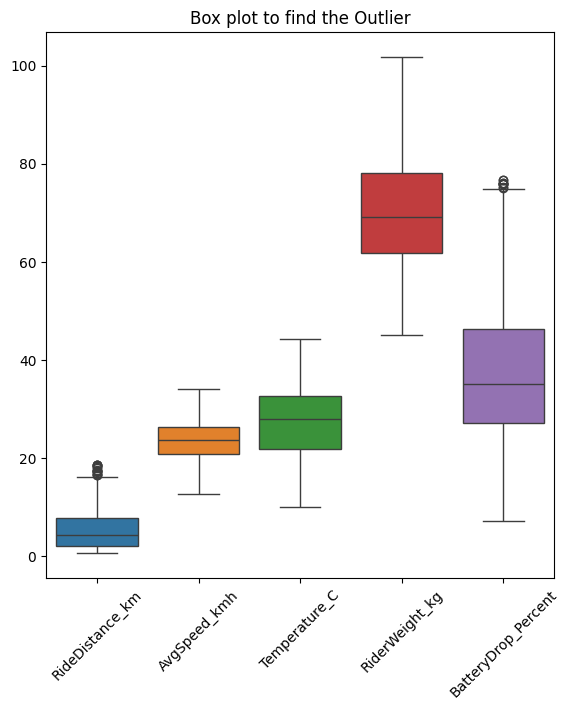

In [92]:
plt.figure(figsize=(6,6))
sns.boxplot(df)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.title("Box plot to find the Outlier")
plt.show()

# skew 

### log1p
### sqrt
### zscore

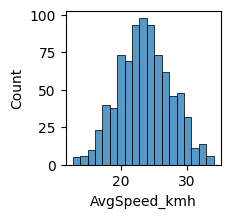

In [93]:
plt.figure(figsize=(2,2))
sns.histplot(df["AvgSpeed_kmh"])
plt.show()

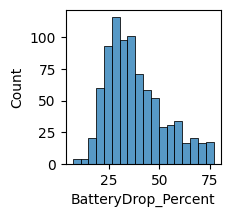

In [94]:
plt.figure(figsize=(2,2))
sns.histplot(df["BatteryDrop_Percent"])
plt.show()

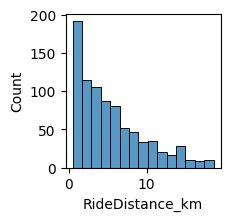

In [95]:
plt.figure(figsize=(2,2))
sns.histplot(df["RideDistance_km"])
plt.show()

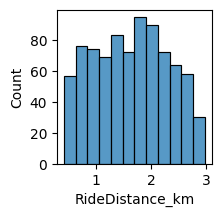

In [96]:
plt.figure(figsize=(2,2))
sns.histplot(np.log1p(df["RideDistance_km"]))
plt.show()


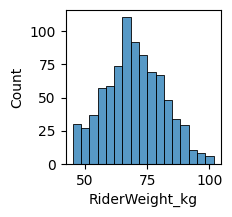

In [97]:
plt.figure(figsize=(2,2))
sns.histplot(df["RiderWeight_kg"])
plt.show()

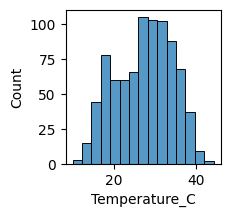

In [98]:
plt.figure(figsize=(2,2))
sns.histplot(df["Temperature_C"])
plt.show()

In [99]:
df.skew()

RideDistance_km        1.035043
AvgSpeed_kmh           0.030179
Temperature_C         -0.203413
RiderWeight_kg         0.077530
BatteryDrop_Percent    0.754840
dtype: float64

# Encoding

In [100]:
df.dtypes # no need

RideDistance_km        float64
AvgSpeed_kmh           float64
Temperature_C          float64
RiderWeight_kg         float64
BatteryDrop_Percent    float64
dtype: object

# Feature engineering


# scaling

In [101]:
sc = StandardScaler()
X = sc.fit_transform(df.drop("BatteryDrop_Percent",axis=1))

In [102]:
X

array([[-0.49218133,  0.12624158,  0.2455683 ,  1.8989261 ],
       [ 3.11371754, -0.49522505, -1.4988811 , -1.43146197],
       [ 0.71053214,  1.037599  ,  0.36741488, -0.15197642],
       ...,
       [ 2.05853344,  1.37210845,  0.15459959,  2.15642109],
       [-1.13957887, -2.72033384,  0.24044599, -0.61317625],
       [-1.03129638, -1.34506983, -0.90997895, -0.07506232]],
      shape=(840, 4))

In [103]:
y = df['BatteryDrop_Percent']